In [2]:
%%capture

!pip install rioxarray
!pip install imageio
!pip install imageio-ffmpeg
!pip install pygifsicle

In [3]:
!pip install ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6084 sha256=72664074c8ae68c19b053512acbdf75cadf992f61e9b51a42da8063e5ebd9dd7
  Stored in directory: /root/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg


In [4]:
import numpy as np
import xarray as xa
import rioxarray as riox
import numpy.ma as ma
import folium
from folium import plugins
import matplotlib.pyplot as plt
from matplotlib import cm
import os
from glob import glob

In [5]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

def make_composite(band_1, band_2, band_3):
    """Converts three raster bands into a composite image"""
    return normalize(np.dstack((band_1, band_2, band_3)))

def make_rgb_composite(raster):
    """Creates an RGB composite image using the input raster."""
    r = raster[2]
    g = raster[1]
    b = raster[0]

    return make_composite(r, g, b)

def calculate_ndvi(raster):
    """Calculates the normalised difference vegetation index using the input raster."""
    r = raster[2]
    nir = raster[3]

    return (nir - r) / (nir + r)

def calculate_ndwi(raster):
    """Calculates the normalised difference water index using the input raster."""
    g = raster[1]
    nir = raster[3]

    return (g - nir) / (g + nir)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
filepath = "/content/drive/My Drive/IndusValleyAgLD"
os.chdir(filepath)

In [8]:
sorted(glob('*.tif'));

In [9]:
import numpy as np
from sklearn.decomposition import PCA

**Creating an Array of the NDVI image data**

In [10]:
data = []

for i in range (1,65,2):
  
  s2_filepath = sorted(glob('IndusValleyAg_20*.tif'))[i]
  s2_raster = riox.open_rasterio(s2_filepath)[:-1]/10000 # Scaled R, G, B and NIR bands.
  ndvi = calculate_ndvi(s2_raster);
  data.append(ndvi[::10,::10])
  del ndvi
  del s2_raster

print(data)

[<xarray.DataArray (y: 589, x: 582)>
array([[ 0.06376361,  0.11221945,  0.12682734, ...,  0.08753862,
         0.1440501 , -0.03575008],
       [ 0.12445605,  0.14285714,  0.10254083, ...,  0.03996896,
        -0.07640449, -0.03785011],
       [ 0.10301109, -0.01727116, -0.01068927, ..., -0.06396453,
        -0.06920821, -0.04511068],
       ...,
       [ 0.21262458,  0.21038961,  0.29158513, ...,  0.01095732,
         0.02470974,  0.04320404],
       [ 0.17361429,  0.26397516,  0.24646465, ...,  0.03776874,
         0.05080621,  0.04334171],
       [ 0.18123275,  0.20480855,  0.24343257, ...,  0.05535499,
         0.07915123,  0.0517788 ]])
Coordinates:
  * x            (x) float64 69.41 69.41 69.41 69.41 ... 69.93 69.93 69.93 69.93
  * y            (y) float64 28.53 28.53 28.53 28.53 ... 28.01 28.01 28.01 28.0
    spatial_ref  int64 0, <xarray.DataArray (y: 589, x: 582)>
array([[ 0.31371661,  0.35541629,  0.56563246, ..., -0.16032811,
        -0.15946349, -0.17879747],
       [ 0.242

**Flattening, Reshaping and Masking the NDVI images**

In [11]:
ndvi_flat = np.reshape(data, (len(data),-1))

In [12]:
del data # Deletes the data no longer needed to save laptop ram

In [13]:
ndvi_flat[np.isnan(ndvi_flat)] = 0.

In [14]:
ndvi_mask = np.where(ndvi_flat>0,0, ndvi_flat) # creates a mask for any NDVI value less than zero as not vegetation

In [15]:
masked_ndvi = ma.masked_array(ndvi_flat, mask = ndvi_mask) # applies the mask to the NDVI image data

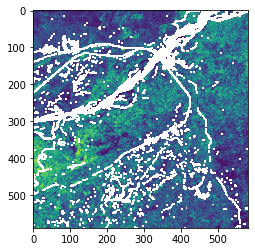

In [16]:
plt.imshow(masked_ndvi[1].reshape((-1,582)))

**Performing PCA on the newly Masking Images**

In [ ]:
pca = PCA(n_components=5)

In [ ]:
pca_ndvi = pca.fit_transform(masked_ndvi) # fitting the PCA to the masked daata with 5 components

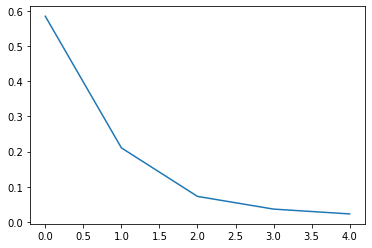

In [ ]:
plt.plot(pca.explained_variance_ratio_) #creates a scree plot showing which components contain most of the image data

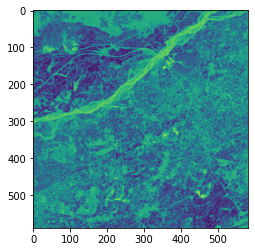

In [ ]:
plt.imshow(pca.components_[0].reshape((-1,582)))

In [ ]:
pca_ndvi.shape

(32, 5)

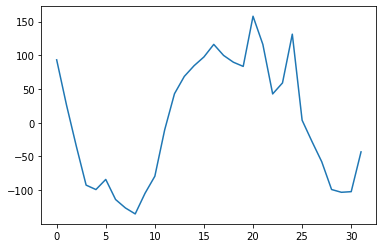

In [ ]:
plt.plot(pca_ndvi[:,0])

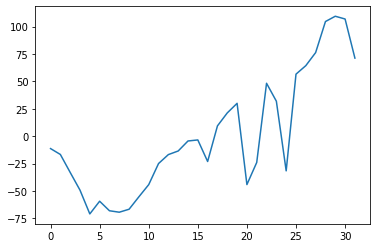

In [ ]:
plt.plot(pca_ndvi[:,1])

##**Testing an animation**

In [ ]:
data2 = []
for i in range(28):
  x = masked_ndvi[i].reshape((-1,582))
  data2.append(x)

In [ ]:
import os
os.chmod('C:/Users/lewis/OneDrive/Documents', 755)

FileNotFoundError: ignored

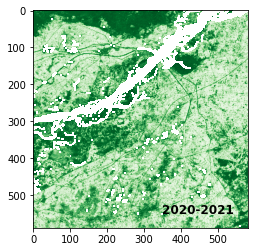

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

img = data2 # an array made up of the masked NDVI images
frames = [] # an array to store each separate image as a new frame of animation
fig = plt.figure()
ax = fig.add_subplot(111)
t = ax.annotate('2020-2021',(350,550), c = 'black', fontsize = 12, weight = 'bold') # add text

for i in range(28): frames.append([t,plt.imshow(img[i], cmap=cm.Greens_r,animated=True)]) # takes images from the array and adds them to the frames array

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,repeat_delay=1000) # makes an animation out of the frames array
ani.save('Indusvalley3.mp4', fps = 10, dpi = 600)
plt.show()

## **Creating a Water Animation**

In [ ]:
data_water = []

for i in range (1,65,2):
  
  s2_filepath = sorted(glob('IndusValleyAg_20*.tif'))[i]
  s2_raster = riox.open_rasterio(s2_filepath)[:-1]/10000 # Scaled R, G, B and NIR bands.
  ndwi = calculate_ndwi(s2_raster);
  data_water.append(ndwi[::10,::10])
  del ndwi
  del s2_raster

print(data_water)

[<xarray.DataArray (y: 589, x: 582)>
array([[-0.10411622, -0.11453561, -0.09903661, ..., -0.0111714 ,
        -0.04447268,  0.02795554],
       [-0.09121622, -0.12097476, -0.12656467, ...,  0.03353768,
         0.05481027,  0.03785011],
       [-0.13884993, -0.09186855, -0.04639376, ...,  0.04737351,
         0.05479452,  0.05673955],
       ...,
       [-0.1957412 , -0.24432577, -0.29411765, ..., -0.07678133,
        -0.08409449, -0.10524557],
       [-0.2394775 , -0.2968667 , -0.24772497, ..., -0.09235474,
        -0.08548083, -0.09061064],
       [-0.22694697, -0.25685091, -0.24890062, ..., -0.11259118,
        -0.10178817, -0.09057706]])
Coordinates:
  * x            (x) float64 69.41 69.41 69.41 69.41 ... 69.93 69.93 69.93 69.93
  * y            (y) float64 28.53 28.53 28.53 28.53 ... 28.01 28.01 28.01 28.0
    spatial_ref  int64 0, <xarray.DataArray (y: 589, x: 582)>
array([[-0.36308126, -0.37636364, -0.55316401, ...,  0.1278079 ,
         0.12149533,  0.14918033],
       [-0.326

In [ ]:
ndwi_flat = np.reshape(data_water, (len(data_water),-1))

In [ ]:
del data_water

In [ ]:
ndwi_flat[np.isnan(ndwi_flat)] = 0.

In [ ]:
ndwi_mask = np.where(ndwi_flat>0,0, ndwi_flat)

In [ ]:
masked_ndwi = ma.masked_array(ndwi_flat, mask = ndwi_mask)

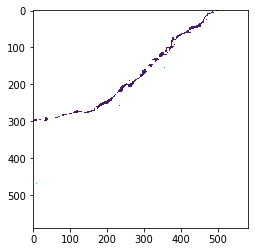

In [ ]:
plt.imshow(masked_ndwi[29].reshape((-1,582)))

In [ ]:
pca = PCA(n_components=5)

In [ ]:
pca_NDWI = pca.fit_transform(masked_ndwi)

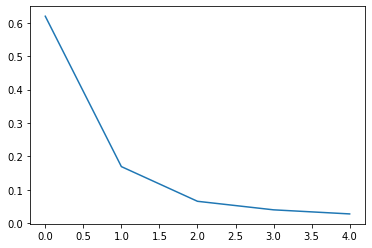

In [ ]:
plt.plot(pca.explained_variance_ratio_)

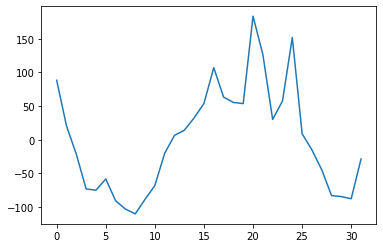

In [ ]:
plt.plot(pca_NDWI[:,0])

**Animation Time**

In [ ]:
data_water2 = []
for i in range(28):
  x = masked_ndwi[i].reshape((-1,582))
  data_water2.append(x)

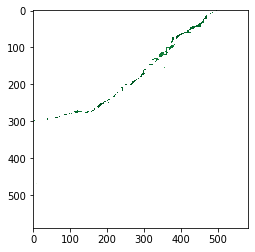

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

img = data_water2 # an array made up of the masked NDVI images
frames = [] # an array to store each separate image as a new frame of animation
fig = plt.figure()
for i in range(28): frames.append([plt.imshow(img[i], cmap=cm.Greens_r,animated=True)]) # takes images from the array and adds them to the frames array

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,repeat_delay=1000) # makes an animation out of the frames array
ani.save('IndusvalleyWater4.mp4', fps=10, dpi=300) #saves the animation and changes the frames per second and pixel density
plt.show()

# A Strange PCA analysis I attempted following an online tutorial

In [ ]:
import pandas as pd
ndvi_df = pd.DataFrame(masked_ndvi)

In [ ]:
feat_cols = ['pixel'+str(i) for i in range(masked_ndvi.shape[1])]

In [ ]:
ndvi_df2 = pd.DataFrame(masked_ndvi,columns=feat_cols)

In [ ]:
print('Size of the dataframe: {}'.format(ndvi_df2.shape))

In [ ]:
ndvi_df2.head()

Kept getting an error saying there were strange values within the data that were either infinity or NaN, so I replaced them with zero or finite numbers. This may have an effect on the actual PCA.

In [ ]:
np.where(np.isnan(ndvi_df2))

In [ ]:
ndvi_df3 = np.nan_to_num(ndvi_df2)

In [ ]:
np.sum(np.isnan(ndvi_df2))

In [ ]:
pca_ndvi = PCA(n_components=2)

In [ ]:
principalComponents_ndvi = pca_ndvi.fit_transform(ndvi_df3)

In [ ]:
pca_df = pd.DataFrame(principalComponents_ndvi, columns = ['principalcomponent1', 'principalcomponent2'])

In [ ]:
print('Explained variation per principal component: {}'.format(pca_ndvi.explained_variance_ratio_))

In [ ]:
print(pca_df)

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(x="principalcomponent1", y="principalcomponent2", data=pca_df, legend="full", alpha=0.3)